Run the cell below if you are using Google Colab to mount your Google Drive in your Colab instance. Adjust the path to the files in your Google Drive as needed if it differs.

If you do not use Google Colab, running the cell will simply do nothing, so do not worry about it.

In [1]:
try:
    from google.colab import drive
    drive.mount('/content/drive/')
    %cd 'drive/My Drive/Colab Notebooks/05_Classification'
except ImportError as e:
    pass

## Exercise 5: Classification

### 5.1. Learning a classifier for the Iris Data Set

In the last exercise, you have learned lazy classification models for the Iris dataset. Now try a Decision Tree based approach with 10-fold cross-validation. Use a pipeline to perform some preprocessing before learning or applying the decision tree classifier.

#### 5.1.1.	Discretise the Iris data set into three bins. Then use the DecisionTreeClassifier with a 10-fold stratified cross validation and compute the accuracy. Afterwards plot the decision tree.

In [2]:
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

## Windows users: either add the path to graphviz' dot.exe to your PATH variable 
## OR comment in the 2 lines below (may have to change path):

import os
os.environ['PATH'] += ';C:\\Program Files (x86)\\Graphviz2.38\\bin'

iris = pd.read_csv("iris.csv")
iris_data = iris[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
iris_target = iris['Name']

# TODO

In [3]:
label_encoder = preprocessing.LabelEncoder()
iris_target = label_encoder.fit_transform(iris['Name'])
iris_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### 5.1.2.	Remove the discretization and adjust the max_depth parameter of DecisionTreeClassifier to increase the accuracy. Does the accuracy change? Compare the complexity of the two models. Which model should be preferred according to Occam’s razor?

In [4]:
# train with all the data
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(iris_data, iris_target)

DecisionTreeClassifier()

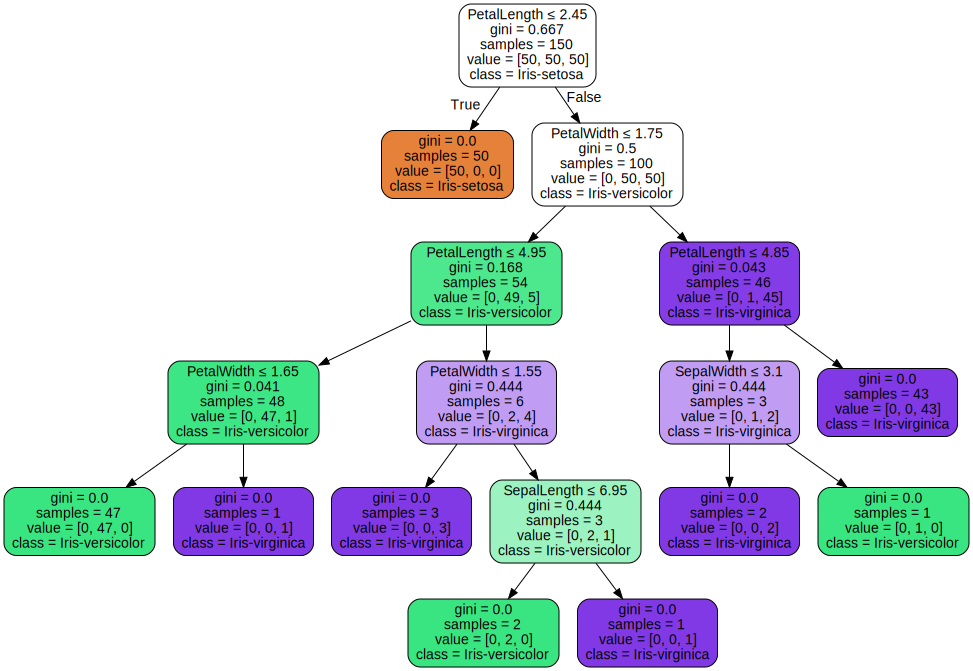

In [5]:
import graphviz 
from sklearn import tree

dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=iris_data.columns, 
                                class_names=label_encoder.classes_,
                               filled=True, rounded=True, special_characters=True) 

graph = graphviz.Source(dot_data) 

display(graph)

# compare normal training with discretization

In [6]:
X_train, X_test, y_train, y_test = train_test_split( iris_data, iris_target, test_size=0.2, random_state=42)

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=0)
random_forest.fit(X_train, y_train)
cross_val_score(random_forest, X_test, y_test, cv=5, scoring="accuracy").mean()

0.9666666666666668

In [8]:
random_forest1 = RandomForestClassifier(max_depth=2, random_state=0)
random_forest1.fit(X_train, y_train)
cross_val_score(random_forest1, X_test, y_test, cv=5, scoring="accuracy").mean()

0.9666666666666668

In [9]:
random_forest2 = RandomForestClassifier(max_depth=5, random_state=0)
random_forest2.fit(X_train, y_train)
cross_val_score(random_forest2,  X_test, y_test, cv=5, scoring="accuracy").mean()

0.9666666666666668

In [10]:
from sklearn.preprocessing import KBinsDiscretizer
from matplotlib import pyplot

In [11]:
# remove discretization
# discretization transform the raw data

kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
data_trans = kbins.fit_transform(iris_data)

X_train, X_test, y_train, y_test = train_test_split( data_trans, iris_target, test_size=0.2, random_state=42)




In [12]:
# random forest no restriction
random_forest3 = RandomForestClassifier(random_state=0)
random_forest3.fit(X_train, y_train)
cross_val_score(random_forest3, X_test, y_test, cv=5, scoring="accuracy").mean()

1.0

In [13]:
# dot_data = tree.export_graphviz(random_forest3, out_file=None, 
#                                 feature_names=iris_data.columns, 
#                                 class_names=label_encoder.classes_,
#                                filled=True, rounded=True, special_characters=True) 

# graph = graphviz.Source(dot_data) 

# display(graph)

# does not work with random forest (multible forest)

## Exercise 5: Classification

### 5.2. Parameter optimization
In Exercise 4.1 we have used the German credit data set from the UCI data set library (http://archive.ics.uci.edu/ml/index.html), which describes the customers of a bank with respect to whether they should get a bank credit or not. The data set is provided as credit-g.arff file in ILIAS.

#### 5.2.1.	(recap) Go back to the results of exercise 4.1.4. Re-run the classifiers with their default parameter settings.
- Used the 10-fold validation approach.
- Balanced the training set multiplying the “bad customer” examples. 
- Evaluated the results, setting up your cost matrix to ((0,100)(1,0)) – that is, you assumed you will lose 1 Unit if you refuse a credit to a good customer, but that you lose 100 Units if you give a bad customer a credit.

Rerun your process to get the performance results. Now additionally use a  Decision Tree Classifier. How does it perform? What were the default parameters of the Decision Tree?

In [14]:
import itertools
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

First, we load the dataset:

In [15]:
import pandas as pd
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder

credit_arff_data, credit_arff_meta = arff.loadarff(open('credit-g.arff', 'r'))
credit_data = pd.DataFrame(credit_arff_data)

# select all columns of type object
columns_with_binary_strings = credit_data.select_dtypes('object').columns.values

# decode the values of these columns using utf-8
credit_data[columns_with_binary_strings] = credit_data[columns_with_binary_strings].apply(lambda x: x.str.decode("utf-8"))
credit_target = credit_data['class']
credit_data = credit_data.drop(columns='class')

label_encoder = LabelEncoder()
credit_target = label_encoder.fit_transform(credit_target)
label_names=['bad','good']
label_order=label_encoder.transform(label_names)

credit_data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes


In [22]:
credit_data_train, credit_data_test, credit_target_train, credit_target_test = train_test_split( credit_data, credit_target, test_size=0.2, random_state=42)


Then, we set up a pipeline and evaluate it using cross validation:

In [23]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix

numeric_features = ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']
categorical_features = ['credit_history', 'purpose', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker']
ordinal_features = [ 'checking_status', 'savings_status', 'employment']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features),
        ('ord', OrdinalEncoder(categories=[
            [ 'no checking', '<0', '0<=X<200', '>=200' ],
            [ 'no known savings', '<100', '100<=X<500', '500<=X<1000', '>=1000' ],
            [ 'unemployed', '<1', '1<=X<4', '4<=X<7', '>=7' ]
        ]), ordinal_features)])

def cost_function(y_true, y_pred): 
    cm = confusion_matrix(y_true, y_pred, labels=label_order)
    return cm[0][1] * 100 + cm[1][0] * 1
    # False Positive is a bigger probelm

display(preprocessor.fit_transform(credit_data))

# ecaluate it using cross validation:

# TODO

array([[-1.23647786, -0.74513141,  0.91847717, ...,  1.        ,
         0.        ,  4.        ],
       [ 2.24819436,  0.94981679, -0.87018333, ...,  2.        ,
         1.        ,  2.        ],
       [-0.73866754, -0.41656241, -0.87018333, ...,  0.        ,
         1.        ,  3.        ],
       ...,
       [-0.73866754, -0.87450324,  0.91847717, ...,  0.        ,
         1.        ,  4.        ],
       [ 1.9992892 , -0.50552769,  0.91847717, ...,  1.        ,
         1.        ,  2.        ],
       [ 1.9992892 ,  0.46245715,  0.02414692, ...,  2.        ,
         2.        ,  0.        ]])

Finally, we fit the pipeline to the dataset and plot the decision tree:

In [28]:
import graphviz 
from sklearn import tree
from sklearn.utils.multiclass import unique_labels

## Windows users: either add the path to graphviz' dot.exe to your PATH variable 
## OR comment in the 2 lines below (may have to change path):

import os
os.environ['PATH'] += ';C:\\Program Files (x86)\\Graphviz2.38\\bin'


cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
estimator = DecisionTreeClassifier()

pipeline = Pipeline([ ('preprocessing', preprocessor), ('estimator', estimator) ])
prediction = cross_val_predict(pipeline, credit_data_train, credit_target_train, cv=cv, n_jobs=-1)
    
# cm = confusion_matrix(credit_target_train, prediction)
# plot_confusion_matrix(cm, classes=unique_labels(credit_data_train), title=type(estimator).__name__)
# print(type(estimator).__name__)
# print(classification_report(credit_target_train, prediction))

#### 5.2.2.	Now, try to find a more appropriate configuration for the Decision Tree classifier. Use the GridSearchCV from scikit-learn. 

Try the following parameters of the Decision Tree:
- criterion: ['gini', 'entropy']
- 'max_depth': [2, 3, 4, 5, None]
- 'min_samples_split' :[2,3,4,5]

You should come up with 48 (2 x 6 x 4) combinations.

What is the best configuration for the data set and the classification approach? 

Note: The grid search can take some time. You can use the ```n_jobs=-1``` parameter setting for the ```cross_val_predict()``` function to enable parallel processing (all CPU cores will be used).

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer


from sklearn.tree import DecisionTreeClassifier
estimator = DecisionTreeClassifier()

# define the parameter grid
parameters = {
    #'criterion':['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, None],
    #'min_samples_split' :[2,3,4,5]
    
    #TODO: add more parameters
}
# estimator.get_params().keys()
# dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])


# define the folds for the cross validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# create a scorer for the grid search
cost_score = make_scorer(cost_function, greater_is_better=False)
# alternative
# #f1 = make_scorer(f1_score, pos_label='>50K')

# # create the grid search estimator
grid_search_estimator = GridSearchCV(pipeline, parameters, scoring=cost_score, cv=cv, return_train_score=False, n_jobs=-1)

# # cross-validate
grid_search_estimator.fit(credit_data_train, credit_target_train)

# # calculate costs
# print("B: {} custom cost score with parameters {}".format(grid_search_estimator.best_score_ * 100, grid_search_estimator.best_params_))





# fit the grid search (= determine the optimal parameters)

ValueError: Invalid parameter max_depth for estimator Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['duration', 'credit_amount',
                                                   'installment_commitment',
                                                   'residence_since', 'age',
                                                   'existing_credits',
                                                   'num_dependents']),
                                                 ('cat', OneHotEncoder(),
                                                  ['credit_history', 'purpose',
                                                   'personal_status',
                                                   'other_parties',
                                                   'property_magnitude',
                                                   'other_payment_plans',
                                                   'housing', 'job',
                                                   'own_telephone',
                                                   'foreign_worker']),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['no '
                                                                              'checking',
                                                                              '<0',
                                                                              '0<=X<200',
                                                                              '>=200'],
                                                                             ['no '
                                                                              'known '
                                                                              'savings',
                                                                              '<100',
                                                                              '100<=X<500',
                                                                              '500<=X<1000',
                                                                              '>=1000'],
                                                                             ['unemployed',
                                                                              '<1',
                                                                              '1<=X<4',
                                                                              '4<=X<7',
                                                                              '>=7']]),
                                                  ['checking_status',
                                                   'savings_status',
                                                   'employment'])])),
                ('estimator', DecisionTreeClassifier())]). Check the list of available parameters with `estimator.get_params().keys()`.

#### 5.1.4.	How does the optimal decision tree differ from the one you have learned in 5.2.1?
Plot the optimised tree!

In [38]:
estimator.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [39]:
random_forest = RandomForestClassifier(random_state=0)

In [40]:
random_forest.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
# define the parameter grid
parameters = {
    'estimator__criterion':['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, None],
    #'min_samples_split' :[2,3,4,5]